In [2]:
from sklearn.linear_model import Ridge
import numpy as np

In [6]:
np.random.seed(42)
m = 20
X = 3*np.random.rand(m, 1)
y = 0.5 * X + np.random.randn(m, 1)/1.5 + 1
X_new = np.linspace(0, 3, 100).reshape(100, 1)


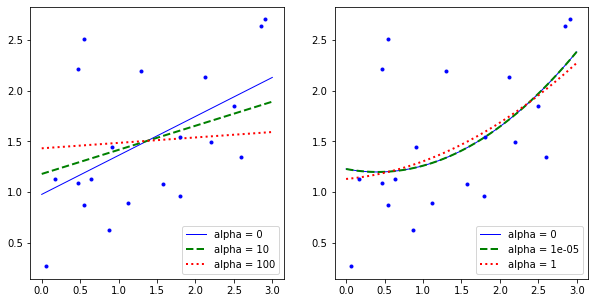

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
def plot_model(model_class, polynomial, alphas, **model_keys):
    for alpha, style in zip(alphas, ('b-', "g--", "r:")):
        model = model_class(alpha, **model_keys)
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree=10)),
                ("StandardScaler", StandardScaler()),
                ('lin_reg', model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha >0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth = lw, label ='alpha = {}'.format(alpha))
    plt.plot(X, y, "b.", linewidth = 3)
    plt.legend()
plt.figure(figsize= (10, 5))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1))